# Preamble

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path

from discretization import create_discretization_element, create_discretization_mesh
from mesh import create_2d_circle
from utils import advection_velocity_field

In [2]:
sns.set_theme(style="whitegrid", context="paper")

EXPORT_DPI = 1200
ASSIGNMENT_DIR = Path().resolve()
OUTPUT_DIR = ASSIGNMENT_DIR / "report" / "output"
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

Total DOFs: 2948


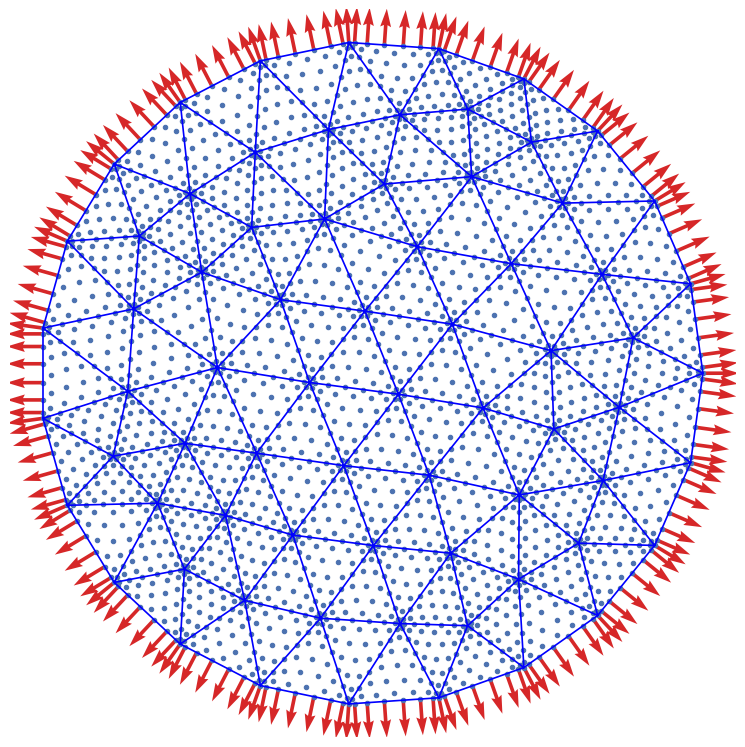

In [3]:
N = 7 # Number of nodes per element
DOMAIN_RADIUS = 1.0
DOMAIN_ORIGIN = (0.0, 0.0)
MESH_SIZE = 100  # Target mesh size

mm = 1/25.4 # inverse millimeters in inches
FIG_SIZE = 240 * mm

# Problem parameters
X_0, Y_0 = -0.75, -0.25
SIGMA = 0.1

t_start = 0.0
t_final = 5.0

mesh = create_2d_circle(radius=1.0, origin=(0.0, 0.0), mesh_size=100)
d_ele = create_discretization_element(N)
d_mesh = create_discretization_mesh(mesh, d_ele)
print(f"Total DOFs: {d_mesh.gidx}")

bc_normals = d_mesh.BC_normals
bc_normals.shape

bc_nodes_x = d_mesh.x_global[d_mesh.BC_nodes]
bc_nodes_y = d_mesh.y_global[d_mesh.BC_nodes]

ax_bc, ay_bc = advection_velocity_field(bc_nodes_x, bc_nodes_y)
a_n = np.einsum('ij,ij->i', np.stack((ax_bc, ay_bc), axis=1), bc_normals)

plt.figure(figsize=(FIG_SIZE, FIG_SIZE))

# Normals
plt.quiver(
    bc_nodes_x,
    bc_nodes_y,
    bc_normals[:, 0],
    bc_normals[:, 1],
    color="tab:red",
    scale=20,
    width=0.005,
    label="Boundary Normals",
)

plt.scatter(
    d_mesh.x_global,
    d_mesh.y_global,
    s=10,
)

# plt.quiver(
#     bc_nodes_x,
#     bc_nodes_y,
#     ax_bc,
#     ay_bc,
#     color="tab:green",
#     scale=25,
#     alpha=0.5,
# )


plt.gca().set_aspect('equal')

# Plot mesh
mesh.plot(plt.gca())

plt.xticks([])
plt.yticks([])
plt.gca().set_frame_on(False)

plt.savefig(OUTPUT_DIR / "boundary_normals.png", dpi=1200, bbox_inches="tight")